# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\12038\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key="7286e12a919b465aa48622344d8ac3c2")

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)
bitcoin_news_en["totalResults"]

def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

bitcoin_en_df = create_df(bitcoin_news_en["articles"], "en")
bitcoin_en_df.head()


,title,description,text,date,language
0,"PayPal expands the ability to buy, hold and se...",PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,2021-08-23,en
1,El Salvador becomes first country to adopt Bit...,Bitcoin is an official currency of El Salvador...,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,2021-09-07,en
2,El Salvador Buys 400 Bitcoin as Crypto Officia...,The government of El Salvador purchased at lea...,The government of El Salvador purchased at lea...,2021-09-07,en
3,How to Pay For Your Vacation With Crypto,Retailers are increasingly accepting cryptocur...,Retailers are increasingly accepting cryptocur...,2021-08-19,en
4,PayPal brings cryptocurrency trading to the UK,"PayPal is bringing the ability to buy, hold an...","PayPal is bringing the ability to buy, hold an...",2021-08-23,en


In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)
ethereum_news_en["totalResults"]

def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

ethereum_en_df = create_df(ethereum_news_en["articles"], "en")
ethereum_en_df.head()

,title,description,text,date,language
0,Offchain Labs raises $120 million to hide Ethe...,As the broader crypto world enjoys a late summ...,As the broader crypto world enjoys a late summ...,2021-08-31,en
1,"PayPal expands the ability to buy, hold and se...",PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,2021-08-23,en
2,PayPal brings cryptocurrency trading to the UK,"PayPal is bringing the ability to buy, hold an...","PayPal is bringing the ability to buy, hold an...",2021-08-23,en
3,Poly Network says it has recovered all $610 mi...,One of the most unusual cryptocurrency heists ...,One of the most unusual cryptocurrency heists ...,2021-08-23,en
4,Ethereum co-creator Vitalik Buterin will help ...,Buterin has previously said a collaboration be...,"Vitalik Buterin, founder of ethereum, during T...",2021-08-18,en


In [21]:
nltk.download("vader_lexicon")
analyzer = SentimentIntensityAnalyzer()

# Create the Bitcoin sentiment scores DataFrame
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text
for index, row in bitcoin_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_news_en_df = bitcoin_en_df.join(text_sentiment_df)

bitcoin_news_en_df.head()

# Describe the Bitcoin Sentiment
bitcoin_news_en_df.describe()

bitcoin_news_en_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\12038\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,title,description,text,date,language,text_compound,text_pos,text_neu,text_neg,text_sent
0,"PayPal expands the ability to buy, hold and se...",PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,2021-08-23,en,0.4215,0.098,0.902,0.0,1
1,El Salvador becomes first country to adopt Bit...,Bitcoin is an official currency of El Salvador...,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,2021-09-07,en,0.1779,0.052,0.948,0.0,1
2,El Salvador Buys 400 Bitcoin as Crypto Officia...,The government of El Salvador purchased at lea...,The government of El Salvador purchased at lea...,2021-09-07,en,0.1280,0.046,0.954,0.0,1
3,How to Pay For Your Vacation With Crypto,Retailers are increasingly accepting cryptocur...,Retailers are increasingly accepting cryptocur...,2021-08-19,en,0.6187,0.153,0.847,0.0,1
4,PayPal brings cryptocurrency trading to the UK,"PayPal is bringing the ability to buy, hold an...","PayPal is bringing the ability to buy, hold an...",2021-08-23,en,0.6908,0.161,0.839,0.0,1


In [7]:
# Create the Ethereum sentiment scores DataFrame

nltk.download("vader_lexicon")
analyzer = SentimentIntensityAnalyzer()

# Create the Ethereum sentiment scores DataFrame
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries

text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text
for index, row in ethereum_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_news_en_df = ethereum_en_df.join(text_sentiment_df)
     
ethereum_news_en_df.head()

# Describe the Ethereum Sentiment
ethereum_news_en_df.describe()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\12038\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.153100,0.056250,0.919650,0.024100,0.400000
std,0.378315,0.056577,0.073526,0.071127,0.820783
min,-0.893400,0.000000,0.688000,0.000000,-1.000000
25%,0.000000,0.000000,0.905000,0.000000,0.000000
50%,0.226300,0.052000,0.928000,0.000000,1.000000
75%,0.426225,0.094000,0.954750,0.000000,1.000000
max,0.735100,0.167000,1.000000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin =  0.062300

Q: Which coin had the highest compound score?

A: Bitcoin = 0.17461

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [8]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12038\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\12038\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', 'asked', 'told'}

In [10]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [14]:

# Create a new tokens column for Bitcoin
bitcoin_news_en_df["tokens"] = bitcoin_en_df.text.apply(tokenizer)
bitcoin_news_en_df



,title,description,text,date,language,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,Offchain Labs raises $120 million to hide Ethe...,As the broader crypto world enjoys a late summ...,As the broader crypto world enjoys a late summ...,2021-08-31,en,0.7351,0.167,0.833,0.000,1,"[broader, crypto, world, enjoys, late, summer,..."
1,"PayPal expands the ability to buy, hold and se...",PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,2021-08-23,en,0.4215,0.098,0.902,0.000,1,"[paypal, allow, user, outside, us, buy, hold, ..."
2,PayPal brings cryptocurrency trading to the UK,"PayPal is bringing the ability to buy, hold an...","PayPal is bringing the ability to buy, hold an...",2021-08-23,en,0.6908,0.161,0.839,0.000,1,"[paypal, bringing, ability, buy, hold, sell, c..."
3,Poly Network says it has recovered all $610 mi...,One of the most unusual cryptocurrency heists ...,One of the most unusual cryptocurrency heists ...,2021-08-23,en,-0.1027,0.000,0.957,0.043,-1,"[one, unusual, cryptocurrency, heist, recent, ..."
4,Ethereum co-creator Vitalik Buterin will help ...,Buterin has previously said a collaboration be...,"Vitalik Buterin, founder of ethereum, during T...",2021-08-18,en,0.0000,0.000,1.000,0.000,0,"[vitalik, buterin, founder, ethereum, techcrun..."


In [16]:
# Create a new tokens column for Ethereum
ethereum_news_en_df["tokens"] = ethereum_news_en_df.text.apply(tokenizer)
ethereum_news_en_df.head(2)

,title,description,text,date,language,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,Offchain Labs raises $120 million to hide Ethe...,As the broader crypto world enjoys a late summ...,As the broader crypto world enjoys a late summ...,2021-08-31,en,0.7351,0.167,0.833,0.0,1,"[broader, crypto, world, enjoys, late, summer,..."
1,"PayPal expands the ability to buy, hold and se...",PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,2021-08-23,en,0.4215,0.098,0.902,0.0,1,"[paypal, allow, user, outside, us, buy, hold, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [27]:
# Generate the Bitcoin N-grams where N=2
bitcoin_p = tokenizer(bitcoin_news_en_df.text.str.cat())

N=2
bigram_counts_B = Counter(ngrams(bitcoin_p, N))
print(dict(bigram_counts_B))

{('paypal', 'allow'): 1, ('allow', 'user'): 2, ('user', 'outside'): 1, ('outside', 'us'): 1, ('us', 'buy'): 1, ('buy', 'hold'): 3, ('hold', 'sell'): 3, ('sell', 'cryptocurrency'): 1, ('cryptocurrency', 'first'): 1, ('first', 'time'): 1, ('time', 'company'): 1, ('company', 'announced'): 1, ('announced', 'today'): 1, ('today', 'launch'): 1, ('launch', 'new'): 1, ('new', 'service'): 1, ('service', 'allow'): 1, ('allow', 'customer'): 2, ('customer', 'uk'): 1, ('uk', 'charsa'): 1, ('charsa', 'recentlyinstalled'): 1, ('recentlyinstalled', 'bitcoin'): 1, ('bitcoin', 'atm'): 1, ('atm', 'today'): 1, ('today', 'bitcoin'): 1, ('bitcoin', 'official'): 1, ('official', 'currency'): 1, ('currency', 'el'): 1, ('el', 'salvador'): 7, ('salvador', 'alongside'): 1, ('alongside', 'us'): 1, ('us', 'dollar'): 1, ('dollar', 'central'): 1, ('central', 'american'): 3, ('american', 'country'): 3, ('country', 'became'): 1, ('became', 'first'): 3, ('first', 'adopt'): 1, ('adopt', 'cryptocur'): 1, ('cryptocur', 'ch

In [28]:
# Generate the Ethereum N-grams where N=2
ethereum_p= tokenizer(ethereum_news_en_df.text.str.cat())
N=2
bigram_counts_E = Counter(ngrams(ethereum_p, N))
print(dict(bigram_counts_E))

{('broader', 'crypto'): 1, ('crypto', 'world'): 1, ('world', 'enjoys'): 1, ('enjoys', 'late'): 1, ('late', 'summer'): 1, ('summer', 'surge'): 1, ('surge', 'enthusiasm'): 1, ('enthusiasm', 'blockchain'): 1, ('blockchain', 'developer'): 1, ('developer', 'taken'): 1, ('taken', 'plunge'): 1, ('plunge', 'bumping'): 1, ('bumping', 'blaring'): 1, ('blaring', 'scaling'): 1, ('scaling', 'issue'): 1, ('issue', 'faced'): 1, ('faced', 'decentralized'): 1, ('decentralized', 'charspaypal'): 1, ('charspaypal', 'allow'): 1, ('allow', 'user'): 1, ('user', 'outside'): 1, ('outside', 'us'): 1, ('us', 'buy'): 1, ('buy', 'hold'): 2, ('hold', 'sell'): 2, ('sell', 'cryptocurrency'): 1, ('cryptocurrency', 'first'): 1, ('first', 'time'): 3, ('time', 'company'): 1, ('company', 'announced'): 1, ('announced', 'today'): 1, ('today', 'launch'): 1, ('launch', 'new'): 1, ('new', 'service'): 1, ('service', 'allow'): 1, ('allow', 'customer'): 1, ('customer', 'uk'): 1, ('uk', 'charspaypal'): 1, ('charspaypal', 'bringing

In [29]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [30]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_common= token_count(bitcoin_p, 10)
bitcoin_common

[('bitcoin', 16),
 ('cryptocurrency', 10),
 ('el', 10),
 ('first', 8),
 ('salvador', 8),
 ('country', 6),
 ('us', 5),
 ('allow', 4),
 ('hold', 4),
 ('customer', 4)]

In [31]:
# Use token_count to get the top 10 words for Ethereum
ethereum_common= token_count(ethereum_p,10)
ethereum_common

[('ethereum', 9),
 ('cryptocurrency', 7),
 ('ha', 7),
 ('network', 6),
 ('bitcoin', 5),
 ('ether', 5),
 ('crypto', 4),
 ('first', 4),
 ('new', 4),
 ('reuters', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

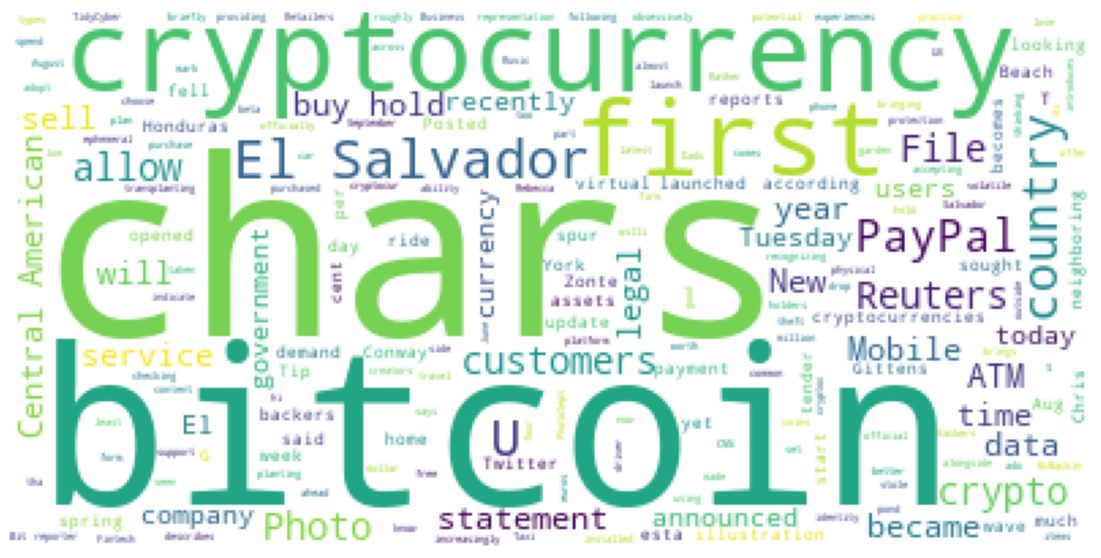

In [35]:
# Generate the Bitcoin word cloud
cloud1 = WordCloud(background_color='white').generate(bitcoin_news_en_df.text.str.cat())
cloud1
plt.axis("off")
plt.imshow(cloud1)

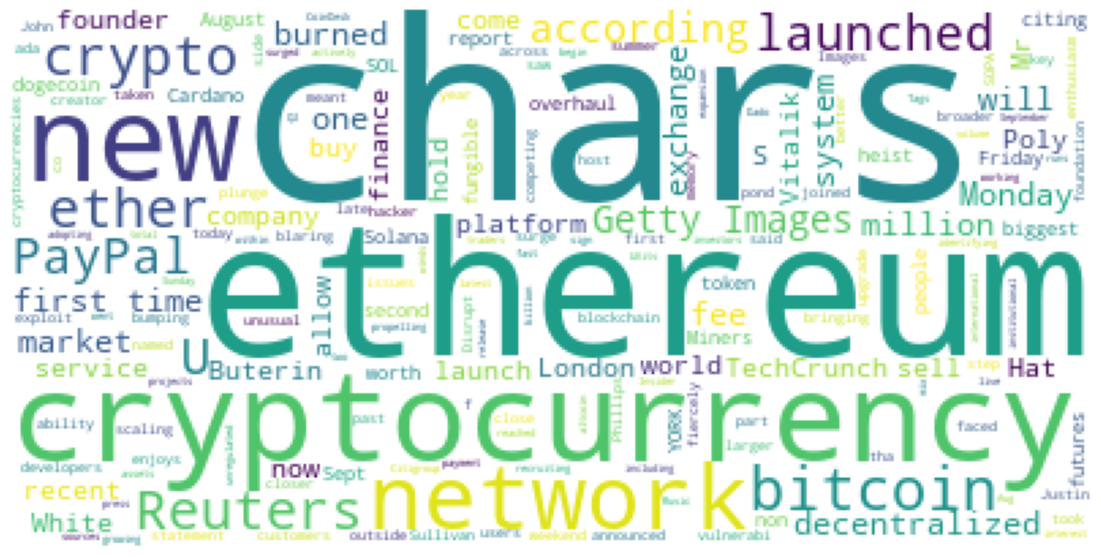

In [36]:
# Generate the Ethereum word cloud
cloud1 = WordCloud(background_color='white').generate(ethereum_news_en_df.text.str.cat())
cloud1
plt.axis("off")
plt.imshow(cloud1)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [39]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [41]:
# Concatenate all of the Bitcoin text together
all_concat_bitcoin = bitcoin_news_en_df.text.str.cat()
all_concat_bitcoin

'PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]A recently-installed Bitcoin ATM.\r\n\n \n\n As of today, Bitcoin is an official currency of El Salvador alongside the US dollar, after the Central American country became the first to adopt the cryptocur… [+2716 chars]The government of El Salvador purchased at least 200 bitcoin recently, ahead of the country officially recognizing bitcoin as a form of legal currency on Tuesday. The purchase brings the governments … [+3142 chars]Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars]PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year a

In [42]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_concat_bitcoin)

# Add a title to the document
bitcoin_doc.user_data["Title"]="Bitcoin"

In [45]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [46]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

PayPal ORG
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Bitcoin ATM ORG
today DATE
El Salvador GPE
US GPE
Central American NORP
first ORDINAL
El Salvador GPE
at least 200 CARDINAL
Tuesday DATE
a year DATE
US GPE
Joe TidyCyber PERSON
Chris PERSON
almost 2,500 CARDINAL
2,100 MONEY
Chris PERSON
chars]New York GPE
CNN ORG
a volatile day DATE
about 10% PERCENT
Tuesday DATE
$43,000 mark MONEY
El Salvador GPE
June DATE
chars]8 ORG
just days DATE
September DATE
spring DATE
Rebecca McMackin PERSON
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo/File Photo/File Photo/File PhotoSept 7 ORG
Reuters ORG
UK GPE
first ORDINAL
four CARDINAL
chars]T-Mobile ORG
two years DATE
roughly 49 million CARDINAL
El Zonte GPE
El Salvador GPE
Bitcoin Beach GPE
Central American NORP
Conway G. Gittens PERSON
27 CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
27 CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
f

---

### Ethereum NER

In [48]:
# Concatenate all of the Ethereum text together
all_concat_ethereum = ethereum_news_en_df.text.str.cat()
all_concat_ethereum

"As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized … [+3414 chars]PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year after it launched in the US. In a statement, the company said tha… [+850 chars]One of the most unusual cryptocurrency heists in recent memory has come to a close. On Monday, Poly Network, a decentralized finance platform that saw a hacker named Mr. White Hat exploit a vulnerabi… [+1513 chars]Vitalik Buterin, founder of ethereum, during TechCrunch Disrupt London 2015.\r\nJohn Phillips/Getty Images for TechCrunch\r\nEthereum co-creator

In [49]:
# Run the NER processor on all of the text
ethereum_doc = nlp(all_concat_ethereum)

# Add a title to the document
ethereum_doc.user_data["Title"]="Ethereum"

In [ ]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [ ]:
# List all Entities
# YOUR CODE HERE!

---